# Sales Prediction using Linear Regression

This project builds a Machine Learning model to predict sales based on advertising and marketing expenditure using Linear Regression.

## Problem Statement

The objective of this project is to build a regression model that predicts sales revenue based on advertising expenditure across different marketing channels.

We aim to:
- Analyze relationships between features and sales
- Train a Linear Regression model
- Evaluate model performance using regression metrics

## Dataset Description

The dataset contains advertising expenditure across three marketing channels:

- TV Advertising Budget
- Radio Advertising Budget
- Newspaper Advertising Budget

The target variable is:

- Sales – representing product sales generated from advertising campaigns.

The goal is to understand how advertising spend influences sales and build a predictive regression model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data= pd.read_excel('/content/advertising_sales_data.xlsx')

In [3]:
data.head()

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9


The "Campaign" column is dropped since it is an identifier and does not contribute to prediction.

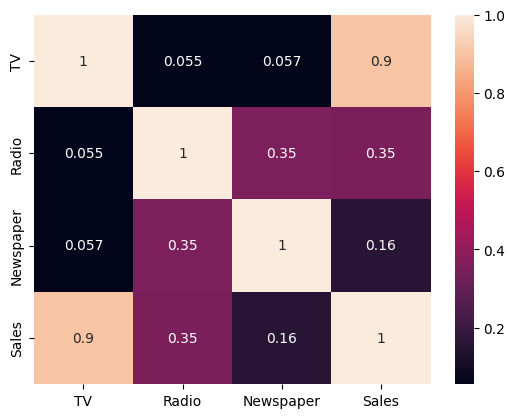

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.show()

Q1. Average amount spent on TV advertisin

In [5]:
data['TV'].mean()

np.float64(147.0425)

Q2. Correlation between Radio and Sales

In [6]:
data[['Radio', 'Sales']].corr()

,Radio,Sales
Radio,1.000000,0.349728
Sales,0.349728,1.000000


Radio advertising has a moderate positive correlation (0.35) with sales, indicating that increased radio spending is associated with higher sales, but its impact is lower compared to TV advertising.

**Q3. Which advertising medium has highest impact?**

In [7]:
data.corr(numeric_only=True)['Sales'].sort_values(ascending=False)

,Sales
Sales,1.000000
TV,0.901208
Radio,0.349728
Newspaper,0.157960


TV has highest impact on Sales.

## Model Building – Linear Regression

Linear Regression is used to model the relationship between advertising expenditure and sales.
It estimates how changes in marketing budget impact predicted sales.

In [8]:
#data cleaning
data.isnull().sum()


,0
Campaign,0
TV,0
Radio,2
Newspaper,0
Sales,0


In [9]:
data = data.dropna()

In [10]:
#define X and y
X= data[['TV', 'Radio', 'Newspaper']]
y= data['Sales']

In [11]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [12]:
#train model
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
#predict
y_pred= model.predict(X_test)

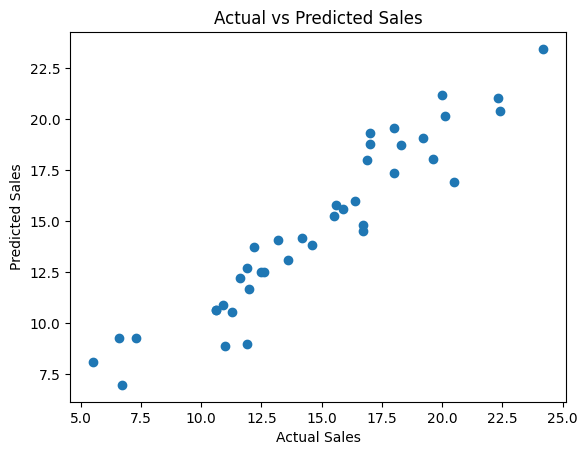

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [15]:
#check accuracy
print('R² before')
model.score(X_test, y_test)

R² before


0.89910282638328

In [16]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R² Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R² Score: 0.89910282638328
MAE: 1.0652333957595161
MSE: 2.0186238976489776
RMSE: 1.4207828467605377


**Model Evaluation**

- R² Score indicates the proportion of variance in sales explained by advertising expenditure.
- MAE represents the average prediction error.
- RMSE penalizes larger errors more heavily.

The model demonstrates a strong linear relationship between advertising spend and sales.

In [17]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coefficients

,Feature,Coefficient
0,TV,0.054303
1,Radio,0.104069
2,Newspaper,0.003808


**Feature Impact Analysis**

The coefficients indicate how much sales are expected to increase
for a one-unit increase in advertising spend, holding other variables constant.

Higher coefficients suggest stronger influence on sales.

Q5- How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?

In [18]:
new_data= [[200,40,50]]
predicted_sales= model.predict(new_data)
print('Predicted sales:', predicted_sales[0])

Predicted sales: 19.81958409813488


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Effect of Feature Scaling on Linear Regression**

Although Linear Regression does not strictly require feature scaling,
we compare model performance before and after normalization
to analyze its impact on regression accuracy.

Let's check how does the performance of the linear regression model change when the dataset is normalized

In [19]:
#apply standardization
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_scaled= scaler.fit_transform(data[['TV', 'Radio', 'Newspaper']])
y= data['Sales']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_scaled = LinearRegression()
model_scaled.fit(X_train, y_train)

r2_scaled = model_scaled.score(X_test, y_test)

print("R² after normalization:", r2_scaled)

R² after normalization: 0.89910282638328


Effect of Normalization: After applying feature scaling using StandardScaler, the R² score remained nearly unchanged.
This shows that Linear Regression is scale-invariant and does not significantly benefit from normalization.

**Let's see what is the impact on sales prediction when only Radio and Newspaper are used as predictors**

In [21]:
X2 = data[['Radio','Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(X_train, y_train)

r2_new = model2.score(X_test, y_test)

print("R² using only Radio & Newspaper:", r2_new)


R² using only Radio & Newspaper: -0.05191341464060373


## Conclusion

- Advertising expenditure has a significant impact on sales.
- The Linear Regression model achieved a strong R² score, indicating good predictive performance.
- TV and Radio advertising show stronger influence compared to Newspaper.

This project demonstrates practical implementation of supervised learning
for regression problems in marketing analytics.